## Gather the data

In [2]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd

import matplotlib.pyplot as plt
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [3]:
def compute_ddg(apo_dg, complex_dg):
    return complex_dg * KT_KCALMOL - apo_dg * KT_KCALMOL

def compute_error(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5 * KT_KCALMOL

In [4]:
# Retrieve free energies

replicate = 1
main_dir = 47
sub_dirs = list(range(0, 4)) + list(range(5, 12)) + list(range(13, 17)) + list(range(18, 28))

d_results = {}
for sub_dir in sub_dirs:
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 100
        else:
            length = 10
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results

main_dir = 45
d_mapping = {4: 11, 12: 10, 17: 9}
for sub_dir in d_mapping.keys():
    d_results[sub_dir] = {}
    if sub_dir == 4:
        replicate = 0
    else:
        replicate = 1
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 100
        else:
            length = 10
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{d_mapping[sub_dir]}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results
        

In [5]:
# Format the data appropriately for cinnabar

titles = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]

to_plot = []

for sub_dir in range(28):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir]['complex']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir]['complex']["dDeltaf"][0, -1])
    if sub_dir in range(14):
        to_plot.append([titles[sub_dir][:-1], titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg, dddg, 0])
    else:
        to_plot.append(["-" + titles[sub_dir][:-1], "-" + titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg * -1, dddg, 0])


In [6]:
to_plot

[['Y29', 'F29', 0.9948791358662206, 0.22198364558637457, 0],
 ['Y29', 'A29', 2.62852863218939, 0.29163379068470835, 0],
 ['W38', 'F38', 0.34745195496360237, 0.2572449528321525, 0],
 ['T42', 'A42', 0.9752029322428015, 0.1244156539717136, 0],
 ['W44', 'F44', 0.2631177081499444, 0.29750708093604017, 0],
 ['E76', 'A76', 0.9855507802750937, 0.614253352589511, 0],
 ['E80', 'A80', 0.3122454478044818, 0.5704088132882701, 0],
 ['D35', 'A35', 1.5904062413437343, 0.5158393959258635, 0],
 ['D39', 'A39', 5.928880418937731, 0.4723729464690775, 0],
 ['K27', 'A27', 2.8344805518751883, 0.6044490067616196, 0],
 ['R59', 'A59', 3.982763895681842, 0.717652705378986, 0],
 ['R83', 'Q83', 2.794894830017153, 0.4527077053229586, 0],
 ['R87', 'A87', 5.10435123812384, 0.6028314107699985, 0],
 ['H102', 'A102', 5.887686926661246, 0.1560086359574765, 0],
 ['-F29', '-Y29', 1.1945415575127427, 0.3407105725115225, 0],
 ['-A29', '-Y29', 1.2399341882202073, 0.31767885310526844, 0],
 ['-F38', '-W38', 0.3595762226861, 0.26

In [7]:
# Get the discrepancy between forward and negative reverse DDGs

for i in range(14):
    print(to_plot[i][0:2], to_plot[i][2] - to_plot[i+14][2])

['Y29', 'F29'] -0.19966242164652215
['Y29', 'A29'] 1.3885944439691826
['W38', 'F38'] -0.01212426772249764
['T42', 'A42'] 0.2906887378196714
['W44', 'F44'] -0.06902284912267309
['E76', 'A76'] -0.1480902008797612
['E80', 'A80'] -0.13175094094893725
['D35', 'A35'] -0.33879236755419995
['D39', 'A39'] -0.3650256217396679
['K27', 'A27'] -0.062172822348188106
['R59', 'A59'] -0.21670635546354333
['R83', 'Q83'] 0.03430513346144082
['R87', 'A87'] -1.7454090643539786
['H102', 'A102'] 0.16745035010370302


In [8]:
# Get the discrepancy from experiment

experiment = [-0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1, -0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1]
for i in range(28):
    print(to_plot[i][0:2], to_plot[i][2] - experiment[i])
    

['Y29', 'F29'] 1.0948791358662207
['Y29', 'A29'] -0.77147136781061
['W38', 'F38'] -1.2525480450363977
['T42', 'A42'] -0.8247970677571985
['W44', 'F44'] 0.2631177081499444
['E76', 'A76'] -0.4144492197249062
['E80', 'A80'] -0.18775455219551818
['D35', 'A35'] -2.909593758656266
['D39', 'A39'] -1.771119581062269
['K27', 'A27'] -2.565519448124812
['R59', 'A59'] -1.2172361043181583
['R83', 'Q83'] -2.6051051699828474
['R87', 'A87'] -0.39564876187615994
['H102', 'A102'] -0.2123130733387537
['-F29', '-Y29'] 1.2945415575127428
['-A29', '-Y29'] -2.1600658117797926
['-F38', '-W38'] -1.2404237773139002
['-A42', '-T42'] -1.11548580557687
['-F44', '-W44'] 0.3321405572726175
['-A76', '-E76'] -0.266359018845145
['-A80', '-E80'] -0.05600361124658093
['-A35', '-D35'] -2.5708013911020657
['-A39', '-D39'] -1.4060939593226012
['-A27', '-K27'] -2.503346625776624
['-A59', '-R59'] -1.000529748854615
['-Q83', '-R83'] -2.639410303444288
['-A87', '-R87'] 1.3497603024778186
['-A102', '-H102'] -0.3797634234424567


In [9]:
# Assemble experimental values

d = {'WT': 19.0, 'A27': 13.6, 'A59': 13.8, 'Q83': 13.6, 'A87': 13.5, 
     'A35': 14.5, 'A39': 11.3, 'A76': 17.65, 'A80': 18.5, 'F29': 19.1, 
     'A29': 15.6, 'F38': 17.4, 'A42': 17.2, 'F44': 19.0, 'A102': 12.9,
     
    '-A27': -13.6, '-A59': -13.8, '-Q83': -13.6, '-A87': -13.5, 
     '-A35': -14.5, '-A39': -11.3, '-A76': -17.65, '-A80': -18.5, '-F29': -19.1, 
     '-A29': -15.6, '-F38': -17.4, '-A42': -17.2, '-F44': -19.0, '-A102': -12.9
    }

experiment = []
for k in d.keys():
    if k == 'WT':
        for wt_residue in ['K27', 'R59', 'R83', 'R87', 'H102', 
                           'D35', 'D39', 'E76', 'E80',
                           'Y29', 'W38', 'T42', 'W44']:
            experiment.append([wt_residue, d[k]*-1, 0.1]) 
            experiment.append(["-" + wt_residue, d[k], 0.1])
    else:
        experiment.append([k, d[k]*-1, 0.1]) 
        
# Note: we take the negative of everything because the free energies are subtracted differently in Schreiber et al

## Calculated vs experiment

In [10]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from cinnabar import plotting, stats, wrangle

In [11]:
# Write csv with data
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_input_longer_all_100ns.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


In [12]:
# Create map with the csv file
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_input_longer_all_100ns.csv')


Graph is not connected enough to compute absolute values


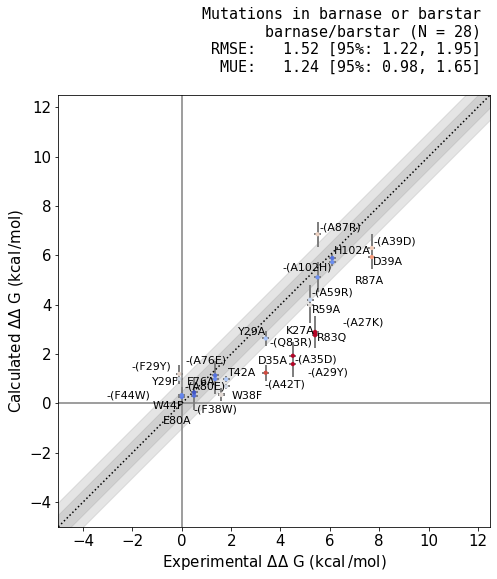

In [13]:
# Generate and save plot
plotting.plot_DDGs(fe.graph, 
                   target_name='barnase/barstar', 
                   title='Mutations in barnase or barstar', 
                   units=r'$\mathrm{kcal\,/mol}$', 
                   filename='/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_longer_all_100ns.pdf', 
                   figsize=10, 
                   dpi=500, 
                   data_label_type='protein-mutation', 
                   xy_lim=[-5, 12.5],
                   font_sizes={"title":15, "labels": 11, "other": 15})


## -Reverse vs Forward plot

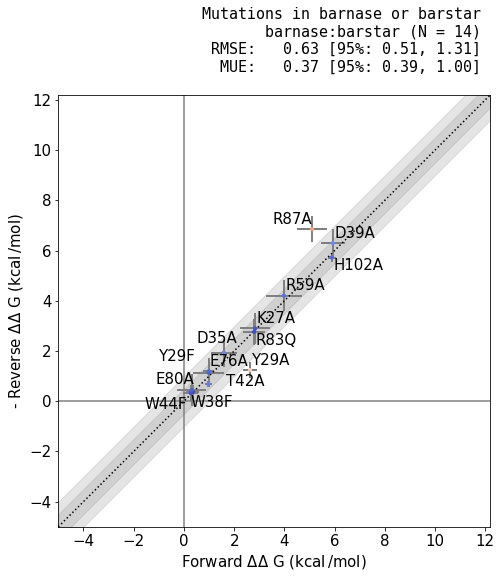

In [15]:
# Format the data appropriately
x = [entry[2] for i, entry in enumerate(to_plot) if i < 14] # forward
y = [entry[2] for i, entry in enumerate(to_plot) if i >= 14] # reverse
xerr =  [entry[3] for i, entry in enumerate(to_plot) if i < 14] # forward
yerr = [entry[3] for i, entry in enumerate(to_plot) if i >= 14] # reverse
x_data = np.asarray(x)
y_data = np.asarray(y)

# Generate the plot
filename = '/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_longer_internal_consistency_all_100ns.pdf'
plot = plotting._master_plot(
    x_data,
    y_data,
    xerr=xerr,
    yerr=yerr,
    filename=filename,
    title="Mutations in barnase or barstar",
    target_name="barnase:barstar",
    xlabel="Forward",
    ylabel="- Reverse",
    units=r'$\mathrm{kcal\,/mol}$', 
    figsize=10, 
    dpi=500,
    xy_lim=[-5, 12.2],
    data_labels=titles[:14],
    font_sizes={"title":15, "labels": 15, "other": 15}
)
